## Probability, Modeling and Simulation



We will do:

* numpy
* Describe a very simple model of coin tosses
* Coin tosses model simulation.
* The notion of a generative model
* Election model. Simulation. 
* Evaluation of the election model.


In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn.apionly as sns

//anaconda/envs/py3l/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
//anaconda/envs/py3l/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


## Hello Numpy

The Numpy array processing library is the basis of nearly all numerical computing in Python. Here's a 30 second crash course. 

In [2]:
print("Make a 3 row x 4 column array of random numbers")
x = np.random.random((3, 4))
print(x,"\n")
print("-----------------")
print("Get the element at row 1, column 2")
print(x[1, 2])

# The colon syntax is called "slicing" the array. 
print("Get the first row")
print(x[0, :])

print("Last 2 items in the first row")
print(x[0, -2:])

print("Get every 2nd item in the first row")
print(x[0, ::2])

Make a 3 row x 4 column array of random numbers
[[0.61884242 0.49132784 0.31945695 0.16061866]
 [0.51935902 0.7594412  0.22220011 0.99668126]
 [0.23668724 0.10647967 0.8755325  0.70110289]] 

-----------------
Get the element at row 1, column 2
0.2222001062911123
Get the first row
[0.61884242 0.49132784 0.31945695 0.16061866]
Last 2 items in the first row
[0.31945695 0.16061866]
Get every 2nd item in the first row
[0.61884242 0.31945695]


In [3]:
print("Max is  ", x.max())
print("Min is  ", x.min())
print("Mean is ", x.mean())

Max is   0.9966812635781632
Min is   0.10647967204759257
Mean is  0.5006441456604073


In [4]:
print(x.max(axis=1))

[0.61884242 0.99668126 0.8755325 ]


In [5]:
print(x.max(axis=0))

[0.61884242 0.7594412  0.8755325  0.99668126]


There are many ways to construct these arrays

In [6]:
thearray = np.array([1, 2, 3, 4, 5])
thearray.shape, thearray.dtype

((5,), dtype('int64'))

In [7]:
ones = np.ones(10, dtype="int64")
ones

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
ones_float = np.ones(10)
ones_float

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [10]:
np.empty((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Operations on numpy arrays are very different from those on regular python lists.

In [11]:
print("Add 1 to every element")
y = x + 1
x, y

Add 1 to every element


(array([[0.61884242, 0.49132784, 0.31945695, 0.16061866],
        [0.51935902, 0.7594412 , 0.22220011, 0.99668126],
        [0.23668724, 0.10647967, 0.8755325 , 0.70110289]]),
 array([[1.61884242, 1.49132784, 1.31945695, 1.16061866],
        [1.51935902, 1.7594412 , 1.22220011, 1.99668126],
        [1.23668724, 1.10647967, 1.8755325 , 1.70110289]]))

This notion of adding 1 to every element, by virtually creating an array of 1's is called **broadcasting**

In [12]:
int_ones_list = [1, 1, 1, 1, 1]
float_ones_list = [1., 1., 1., 1., 1.]
int_ones_list + float_ones_list

[1, 1, 1, 1, 1, 1.0, 1.0, 1.0, 1.0, 1.0]

This is not perhaps what you wanted....you might have wanted this

In [13]:
twos = ones + ones_float
ones, ones_float, twos

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]))

In [14]:
r = np.random.random(10)
r

array([0.24984588, 0.63611287, 0.89406946, 0.18094984, 0.00256106,
       0.42971913, 0.31723764, 0.73570232, 0.76279214, 0.04759182])

More broadcasting

In [15]:
r*2, r/2

(array([0.49969175, 1.27222574, 1.78813891, 0.36189968, 0.00512213,
        0.85943827, 0.63447528, 1.47140465, 1.52558429, 0.09518364]),
 array([0.12492294, 0.31805643, 0.44703473, 0.09047492, 0.00128053,
        0.21485957, 0.15861882, 0.36785116, 0.38139607, 0.02379591]))

In [16]:
r*twos

array([0.49969175, 1.27222574, 1.78813891, 0.36189968, 0.00512213,
       0.85943827, 0.63447528, 1.47140465, 1.52558429, 0.09518364])

In [17]:
np.dot(r, twos)

8.513164333622484

We can also play with 2D arrays

In [18]:
my_array2d = np.array([ [1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12] ])
my_array2d

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [19]:
my_array2d.shape

(3, 4)

In [20]:
my_array2d[2, 3]

12

Slicing is supported in 2D arrays.

![](images/2dindex_v2.png)

In [21]:
x + my_array2d

array([[ 1.61884242,  2.49132784,  3.31945695,  4.16061866],
       [ 5.51935902,  6.7594412 ,  7.22220011,  8.99668126],
       [ 9.23668724, 10.10647967, 11.8755325 , 12.70110289]])

In [22]:
threetwos = 2.0*np.ones(3)
threetwos

array([2., 2., 2.])

To put this in 2-D array form, we can use reshape:

In [23]:
threetwos.reshape(-1,1)

array([[2.],
       [2.],
       [2.]])

Now we can have some broadcasting fun

In [24]:
print(my_array2d)
my_array2d*threetwos.reshape(-1,1)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


array([[ 2.,  4.,  6.,  8.],
       [10., 12., 14., 16.],
       [18., 20., 22., 24.]])

You can transpose arrays

In [25]:
my_array2d.T

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [26]:
my_array2d.T*threetwos

array([[ 2., 10., 18.],
       [ 4., 12., 20.],
       [ 6., 14., 22.],
       [ 8., 16., 24.]])

Reshape is very general

In [27]:
my_array2d.reshape(4,3) #whats happening here?

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

### What is probability?

### The rules of probability

We have seen multiple notions of probability so far. One might assign probabilities based on symmetry, for eg, 2 sides of a fair coin, or six sides of a fair dice. One might assign probabilities based on doing an experiment. such as the long run number of heads in many coin flips. One might assign probabilities based on beliefs; and one might even assign probabilities to events that have no chance of repeating, such as the 2012 presidential election, or the probability of rain between 2pm and 6pm today.

Thus, the very definition of probability seems to be wishy-washy and subjective. Thus you might wonder how you might work with such probabilities. For this, we turn to the rules of probability.

The rules dont care where our probabilities come from, as to how we estimated them, as long as they behave in intuitively sensible ways. 

Consider an example: 

E is the event of getting a heads in a first coin toss, and F is the same for a second coin toss. Here $\Omega$, the set of all possibilities that can happen when you toss two coins is $\{HH, HT, TH, TT\}$. Since E only specifies that the first toss is heads, $E=\{HT, HH\}$. Similarly $F= {HH, TH}$ The set of all events that are not E then is $\tilde{E} = {TH, TT}$.

These sets, along with some others are captured in the venn diagram below:

![2 coin toss venn diagram](images/venn.png) 

The critical notions of probability are:

**Something must happen**

$$P(\Omega) =1$$

**Complementary events must have probabilities summing to 1**

Either E happened or didnt. So,

$$P(E) + P(\sim E) = 1$$

**The Multiply/And/Intersection Formula for independent events**: If E and F are independent events, the probability of both events happening together $P(EF)$ or $P(E \cap F)$ (read as E and F or E intersection F, respectively) is the multiplication of the individual probabilities.

$$ P(EF) = P(E) P(F) .$$

If you made the two independent coin tosses in our example, and you had a fair coin, the probability of both coming up heads is $(1/2)*(1/2) = 1/4$. This makes intuitive sense: half the time the first coin comes up heads, and then 1/2 the time the second coin comes up heads, so its 1/4 of the times that both come up heads.


**The Plus/Or/Union Formula** 

We can now ask the question, what is $P(E+F)$, the odds of E alone, F alone, or both together. Translated into English, we are asking, whats the probability that only the first toss was heads, or only the second toss was heads, or that both came up heads?  Or in other words, what are the odds of at least one heads? The answer to this question is given by the rule:

$$P(E+F) = P(E) + P(F) - P(EF),$$ 

the "plus" formula, where E+F, read as E or F (also $E \cup F$, reads as E union F) means "E alone, F alone, **or** both together". This rule is a hard one to understand and has a lot of notation, so lets examine it in some detail.

There are four ways that these two tosses can arrange themselves, as illustrated by this diagram.

![2 coin flips](images/2flips.png) 

We can have a HH, HT, TH, or TT. In three out of 4 of these cases, either the first toss was heads, or the second was heads. Thus $P(E+F)=3/4$. 

The formula says, add the odds that "the first toss was a heads, without worrying about the second one (1/2), to the probability that the second toss was a heads, without worrying about the first one" (1/2). Since this double counts the situation where both are heads; subtract that (1/4):

\begin{eqnarray*}
P(E+F) \, & = &\, P(E) + P(F) - P(EF)\\
\frac{3}{4} \, & = &\, \frac{1}{2} + \frac{1}{2} - \frac{1}{4} 
\end{eqnarray*}


### A simple Election Model

In the last section, we made a simple simulation of a coin-toss on the computer from a fair-coin model which associated equal probability with heads and tails. Let us consider another model here, a table of probabilities that [PredictWise](http://www.predictwise.com/results/2012/president) made on October 2, 2012 for the US presidential elections. 
PredictWise aggregated polling data and, for each state, estimated the probability that the Obama or Romney would win. Here are those estimated probabilities:

In [28]:
predictwise = pd.read_csv('data/predictwise.csv').set_index('States')
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


Each row is the probability predicted by Predictwise that Romney or Obama would win a state. The votes column lists the number of electoral college votes in that state. 

Remember that simulation is used in different ways in the modelling process. Simulations might be used to propagate differential equations which describe the weather from different initial conditions. In this case they are used to create the model. In the coin flips case, they are used to illustrate the predictions of the model of a fair coin. This example is in the same spirit: we are given a (somehow obtained) list of win probabilities for the states of the US. 
Later on in this book we will explore some approaches to estimating probabilities like these and quatifying our uncertainty about them. But for the time being, we will focus on how to make a prediction assuming these probabilities are known.

Lets plot a map of the probability that Obama wins each state, according to this prediction.

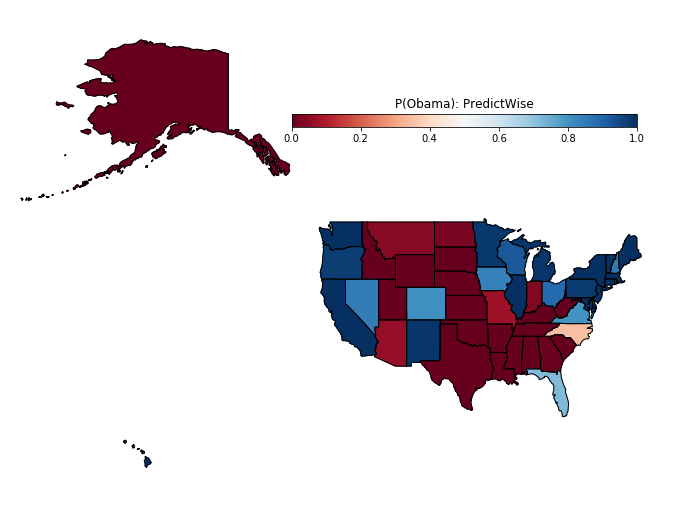

In [29]:
from statesplot import make_map, load_states_geom
s2p = load_states_geom("data/us-states.json")
make_map(s2p, predictwise.Obama, "P(Obama): PredictWise");

You might be tempted from seeing this map to wonder why Romney ever thought he would win this election. But lets be patient: remember these are just probabilities, and this is our model of the election as of October 12th, 2012.

In the case of the tossed coins, even though we had a model which said that the probability of heads was 0.5, there were sequences of flips in which more or less than half the flips were heads. Similarly, here, if the probability of Romney winning in Arizona is 0.938, it means that if somehow, there were 1000 replications with an election each, Romney would win in 938 of those Arizonas **on the average** across the replications. And there would be some samples with Romney winning more, and some with less. We can run these **simulated** universes on a computer though not in real life.

#### Simulating the model

To do this, 
we will assume that the outcome in each state is the result of an independent coin flip whose probability of coming up Obama is given by the Predictwise state-wise win probabilities. Lets write a function `simulate_election` that uses this **predictive model** to simulate the outcome of the election given a table of probabilities.

In the code below, each column simulates a single outcome from the 50 states + DC by choosing a random number between 0 and 1. Obama wins that simulation if the random number is $<$ the win probability. If he wins that simulation, we add in the electoral votes for that state, otherwise we dont. We do this `n_sim` times and return a list of total Obama electoral votes in each simulation.

In [30]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    #summing over rows gives the total electoral votes for each simulation
    return obama_votes.sum(axis=0)

Lets unpack this function a bit, as a lot goes on.

First we decide to make, say 100 simulations. We'll create 51 rows of 100 random numbers (100 columns) between 0 and 1

In [31]:
sims = np.random.uniform(size=(51, 100))
print(sims.shape)
sims

(51, 100)


array([[0.84035802, 0.00279812, 0.47984771, ..., 0.01653916, 0.62694945,
        0.11965677],
       [0.4554652 , 0.71649699, 0.46423596, ..., 0.87503004, 0.65208058,
        0.98158964],
       [0.18205686, 0.20159486, 0.57085582, ..., 0.4313042 , 0.60464548,
        0.57872615],
       ...,
       [0.7051999 , 0.66467847, 0.68242191, ..., 0.4881454 , 0.52609102,
        0.92812685],
       [0.45121408, 0.6445657 , 0.76308506, ..., 0.52319581, 0.1896238 ,
        0.17838221],
       [0.70372963, 0.36121546, 0.96049084, ..., 0.6710872 , 0.44591258,
        0.04785465]])

Now, consider the sixth row, or sixth state, Colorado

In [32]:
print(predictwise.iloc[5])
sims[5,:]

Obama     0.807
Romney    0.193
Votes     9.000
Name: Colorado, dtype: float64


array([0.29543111, 0.52869454, 0.28609812, 0.25722327, 0.73478869,
       0.54309531, 0.44599125, 0.31642094, 0.19805633, 0.36375807,
       0.40844081, 0.25904081, 0.67778545, 0.68958565, 0.08551143,
       0.12403973, 0.51415794, 0.41636413, 0.641265  , 0.82859539,
       0.98678821, 0.58039124, 0.63185607, 0.2023586 , 0.20612927,
       0.4621499 , 0.82846129, 0.57859412, 0.87882416, 0.45543129,
       0.49650111, 0.14672218, 0.40756933, 0.59113172, 0.6627437 ,
       0.67890791, 0.30251013, 0.41559199, 0.5991799 , 0.73337722,
       0.01778114, 0.9448591 , 0.05495326, 0.82922908, 0.92928927,
       0.91164436, 0.875752  , 0.09248843, 0.04474078, 0.08736654,
       0.00834996, 0.24275716, 0.56971077, 0.28480775, 0.38362607,
       0.31395337, 0.04087726, 0.87323896, 0.85527857, 0.63294465,
       0.27276316, 0.91093678, 0.36061834, 0.38295936, 0.98055145,
       0.96255099, 0.51473089, 0.44909715, 0.16543669, 0.45607495,
       0.14456735, 0.07934432, 0.595019  , 0.98640292, 0.68600

With an Obama probability of about 0.8, This means that if I threw down random numbers between 0 and 1 **uniformly**, about 80% should be below 0.8. So we can pick the simulations in which Obama wins Colorado by seeing in how many of the simulations the random number thrown is less than 0.8

In [33]:
sims[5,:] < predictwise.loc['Colorado'].Obama

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True, False,  True,  True, False,  True,  True,
        True])

This is a boolean numpy array. Summing coerces the True to 1 and False to 0 and gives us the total number of simulations

In [34]:
np.sum(sims[5,:] < predictwise.loc['Colorado'].Obama)

80

And the fraction from the mean:

In [35]:
np.mean(sims[5,:] < predictwise.loc['Colorado'].Obama)

0.8

Lets do it for all the states now. 51 rows of 100 trues and Falses

In [36]:
sims < predictwise.Obama.values.reshape(-1,1) # reshape for broadcasting

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False]])

Multiply by the number of electoral Votes in each state

In [37]:
(sims < predictwise.Obama.values.reshape(-1,1))*predictwise.Votes.values.reshape(-1,1)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [10, 10, 10, ..., 10, 10, 10],
       [ 0,  0,  0, ...,  0,  0,  0]])

If I sum the columns now, I get the total electoral votes in the country for Obama in each simulation

In [38]:
np.sum((sims < predictwise.Obama.values.reshape(-1,1))*predictwise.Votes.values.reshape(-1,1), axis=0)

array([332, 303, 332, 318, 347, 332, 329, 332, 303, 316, 310, 332, 332,
       313, 299, 347, 332, 326, 357, 323, 332, 319, 314, 290, 312, 297,
       323, 311, 313, 324, 314, 332, 332, 318, 322, 347, 325, 285, 332,
       326, 341, 338, 297, 323, 289, 323, 293, 343, 341, 303, 266, 330,
       332, 347, 306, 334, 302, 323, 270, 303, 332, 313, 332, 297, 323,
       338, 299, 345, 316, 303, 303, 337, 324, 310, 332, 319, 329, 347,
       332, 312, 319, 299, 322, 287, 290, 334, 326, 308, 339, 310, 325,
       293, 316, 310, 318, 332, 329, 312, 290, 319])

This is how `simulate_election` works.

The following code takes the necessary probabilities for the Predictwise data, and runs 10000 simulations. If you think of this in terms of our coins, think of it as having 51 biased coins, one for each state, and tossing them 10,000 times each.

We use the results to compute the number of simulations, according to this predictive model, that Obama wins the election (i.e., the probability that he receives 269 or more electoral college votes)

In [39]:
result = simulate_election(predictwise, 10000)
print(type(result))
np.sum(result >= 269)

<class 'numpy.ndarray'>


9956

There are roughly only 50 simulations in which Romney wins the election!

#### Displaying the prediction

Now, lets visualize the simulation. We will build a histogram from the result of `simulate_election`. We will **normalize** the histogram by dividing the frequency of a vote tally by the number of simulations. We'll overplot the "victory threshold" of 269 votes as a vertical black line and the result (Obama winning 332 votes) as a vertical red line.

We also compute the number of votes at the 5th and 95th quantiles, which we call the spread, and display it (this is an estimate of the outcome's uncertainty). By 5th quantile we mean that if we ordered the number of votes Obama gets in each simulation in increasing order, the 5th quantile is the number below which 5\% of the simulations lie. 

We also display the probability of an Obama victory    
    

In [40]:
def plot_simulation(simulation):    
    plt.hist(simulation, bins=np.arange(200, 538, 1), 
             label='simulations', align='left', normed=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    sns.despine()

//anaconda/envs/py3l/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


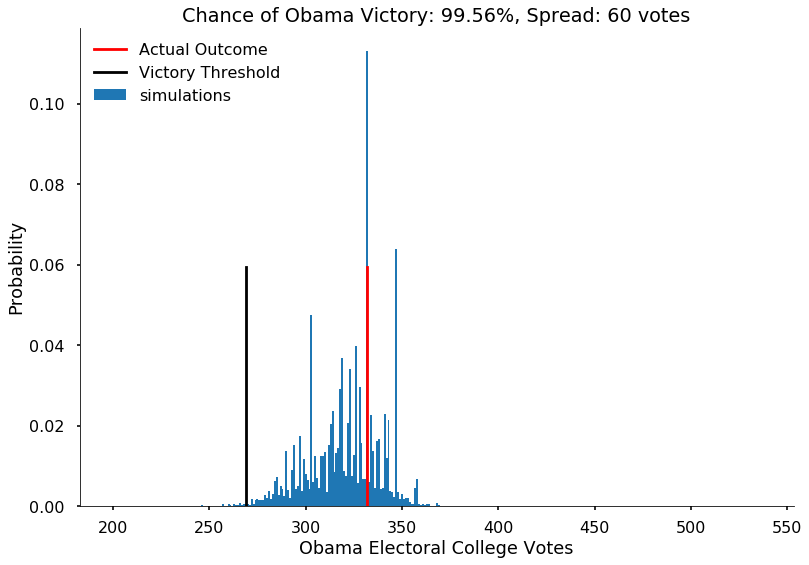

In [41]:
with sns.plotting_context('poster'):
    plot_simulation(result)

The model created by combining the probabilities we obtained from Predictwise with the simulation of a biased coin flip corresponding to the win probability in each states leads us to obtain a histogram of election outcomes. We are plotting the probabilities of a prediction, so we call this distribution over outcomes the **predictive distribution**. Simulating from our model and plotting a histogram allows us to visualize this predictive distribution. In general, such a set of probabilities is called a **probability distribution** or **probability mass function**. 